# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create lists to hold values
City_ID = []
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []


In [4]:
# Declare the url
url = "http://api.openweathermap.org/data/2.5/weather?"

print(f"Beginning Data Retrieval")
print(f"------------------------")

# Loop through the cities
for city in cities:
    
    query_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    city_weather = requests.get(query_url).json()
    
    try: 
        City.append(city_weather['name'])
        Cloudiness.append(city_weather['clouds']['all'])
        Country.append(city_weather['sys']['country'])
        Date.append(city_weather['dt'])
        Humidity.append(city_weather['main']['humidity'])
        Lat.append(city_weather['coord']['lat'])
        Lng.append(city_weather['coord']['lon'])
        Max_Temp.append(city_weather['main']['temp_max'])
        Wind_Speed.append(city_weather['wind']['speed'])
        City_ID.append({cities.index(city)})
        print(f'Processing: {cities.index(city)} | {city}')
    except:
        print(f"We could not find {city}")
        pass

print(f"------------------------")    
print(f"Data Retrieval Complete")
print(f"------------------------")

Beginning Data Retrieval
------------------------
Processing: 0 | arraial do cabo
Processing: 1 | maniwaki
Processing: 2 | ojinaga
Processing: 3 | mayskiy
Processing: 4 | albany
Processing: 5 | atuona
Processing: 6 | cotonou
Processing: 7 | busselton
Processing: 8 | pevek
Processing: 9 | kodiak
Processing: 10 | new norfolk
Processing: 11 | bambous virieux
Processing: 12 | barrow
Processing: 13 | kindu
Processing: 14 | barra do garcas
Processing: 15 | olinda
Processing: 16 | iqaluit
Processing: 17 | nova kakhovka
Processing: 18 | ushtobe
We could not find felidhoo
Processing: 20 | rikitea
Processing: 21 | taungdwingyi
Processing: 22 | tuktoyaktuk
We could not find doctor pedro p. pena
Processing: 24 | qaanaaq
Processing: 25 | haines junction
Processing: 26 | chuy
Processing: 27 | mahebourg
Processing: 28 | severo-kurilsk
Processing: 29 | byron bay
Processing: 30 | bluff
Processing: 31 | aripuana
Processing: 32 | matara
Processing: 33 | ushuaia
Processing: 34 | acapulco
Processing: 35 | 

We could not find marcona
Processing: 300 | haverfordwest
Processing: 301 | begamganj
We could not find samusu
Processing: 303 | hamilton
Processing: 304 | alofi
Processing: 305 | kaeo
Processing: 306 | luganville
Processing: 307 | helong
Processing: 308 | channel-port aux basques
Processing: 309 | dunedin
Processing: 310 | upernavik
Processing: 311 | bardiyah
Processing: 312 | gumdag
Processing: 313 | mareeba
Processing: 314 | sur
Processing: 315 | hualmay
We could not find satitoa
We could not find umm durman
Processing: 318 | onoda
Processing: 319 | henties bay
Processing: 320 | linjiang
Processing: 321 | avaton
Processing: 322 | mahon
We could not find uwayl
Processing: 324 | omsukchan
Processing: 325 | coria
Processing: 326 | dingle
Processing: 327 | tukrah
Processing: 328 | vila velha
Processing: 329 | karratha
Processing: 330 | lages
Processing: 331 | obo
Processing: 332 | yar-sale
Processing: 333 | arlit
Processing: 334 | lake city
Processing: 335 | swan hill
Processing: 336 | 

Processing: 604 | irbeyskoye
Processing: 605 | chingirlau
Processing: 606 | leningradskiy
We could not find kamenskoye
Processing: 608 | humaita
Processing: 609 | nongan
Processing: 610 | usinsk
Processing: 611 | dawson creek
We could not find port-de-paix
Processing: 613 | makungu
Processing: 614 | lerwick
Processing: 615 | conceicao do araguaia
Processing: 616 | kupang
Processing: 617 | saint anthony
Processing: 618 | bahia blanca
Processing: 619 | ewa beach
Processing: 620 | gamba
Processing: 621 | chestermere
We could not find solsvik
Processing: 623 | ifakara
Processing: 624 | burkburnett
Processing: 625 | bathsheba
------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame to store the values from the API calls
city_data_df = pd.DataFrame({
    "City ID": City_ID,
    "City": City,
    "Lat": Lat,
    "Lng": Lng,
    "Max Temp": Max_Temp,
    "Humidity": Humidity,
    "Cloudiness": Cloudiness,
    "Wind Speed": Wind_Speed,
    "Country": Country,
    "Date": Date})

city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = "s")


city_data_df

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,{0},Arraial do Cabo,-22.9661,-42.0278,77.00,83,75,5.75,BR,2021-02-07 18:26:33
1,{1},Maniwaki,46.3834,-75.9660,21.20,79,100,6.91,CA,2021-02-07 18:24:47
2,{2},Ojinaga,29.5667,-104.4167,66.99,15,1,3.44,MX,2021-02-07 18:26:33
3,{3},Mayskiy,47.6931,40.1025,15.80,67,0,4.47,RU,2021-02-07 18:26:34
4,{4},Albany,42.6001,-73.9662,30.00,74,100,4.45,US,2021-02-07 18:21:35
...,...,...,...,...,...,...,...,...,...,...
554,{620},Gamba,-2.6500,10.0000,78.94,85,100,6.29,GA,2021-02-07 18:27:43
555,{621},Chestermere,51.0334,-113.8187,-8.00,77,20,8.05,CA,2021-02-07 18:23:59
556,{623},Ifakara,-8.1333,36.6833,76.03,89,32,3.56,TZ,2021-02-07 18:27:43
557,{624},Burkburnett,34.0979,-98.5706,46.40,61,20,18.41,US,2021-02-07 18:27:43


In [6]:
# Write the data to a csv
city_data_df.to_csv("../output_data/cities.csv", encoding="utf-8", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,18.866499,18.324435,51.163256,71.599284,52.042934,8.676136
std,33.223523,91.012428,33.325871,19.953182,39.021430,6.577173
min,-54.800000,-179.166700,-40.000000,11.000000,0.000000,0.180000
25%,-8.847100,-60.152400,30.000000,62.000000,6.500000,4.130000
50%,21.346900,24.731400,64.330000,77.000000,61.000000,6.910000
75%,46.717550,104.196650,77.090000,86.000000,90.000000,11.500000
max,78.218600,178.416700,97.120000,100.000000,100.000000,47.180000


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(city_data_df.loc[city_data_df["Humidity"] > 100].index, inplace=False)

clean_city_data.head()

,City ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,{0},Arraial do Cabo,-22.9661,-42.0278,77.00,83,75,5.75,BR,2021-02-07 18:26:33
1,{1},Maniwaki,46.3834,-75.9660,21.20,79,100,6.91,CA,2021-02-07 18:24:47
2,{2},Ojinaga,29.5667,-104.4167,66.99,15,1,3.44,MX,2021-02-07 18:26:33
3,{3},Mayskiy,47.6931,40.1025,15.80,67,0,4.47,RU,2021-02-07 18:26:34
4,{4},Albany,42.6001,-73.9662,30.00,74,100,4.45,US,2021-02-07 18:21:35


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

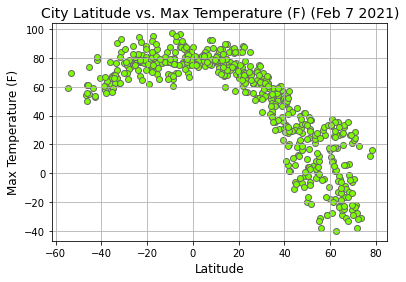

In [9]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="lawngreen", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Max Temperature (F) (Feb 7 2021)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-temp.png")
plt.show()


## Latitude vs. Humidity Plot

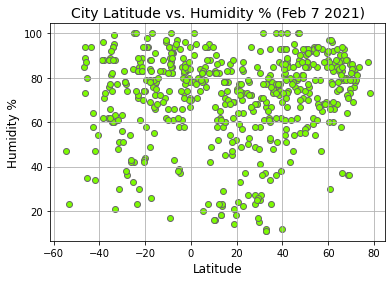

In [10]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="lawngreen", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Humidity % (Feb 7 2021)", fontsize=14)
plt.ylabel("Humidity %", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

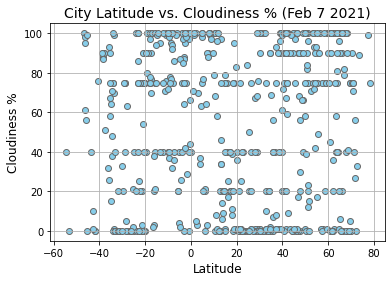

In [11]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="skyblue", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Cloudiness % (Feb 7 2021)", fontsize=14)
plt.ylabel("Cloudiness %", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

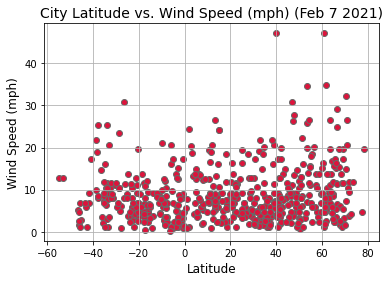

In [12]:
# Create scatter plot
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="crimson", edgecolors="dimgrey")

# Add labels, title, limits & grid 
plt.title("City Latitude vs. Wind Speed (mph) (Feb 7 2021)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# Display and Save plot
plt.savefig("../output_data/latitude-vs-windspeed.png")
plt.show()


## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7640539569923689


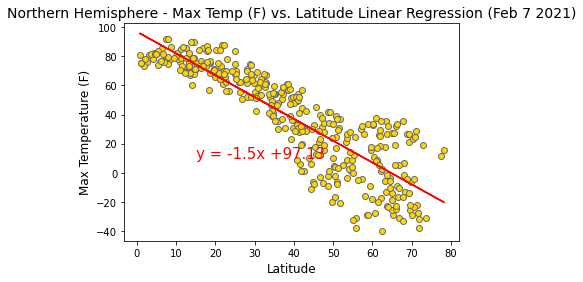

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a Scatter Plot for max temperature vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(15,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.31383184102850586


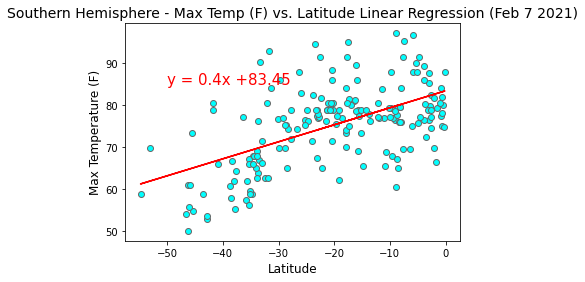

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a Scatter Plot for max temperature vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Max Temperature (F)', fontsize=12)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-50, 85),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0736913088503578


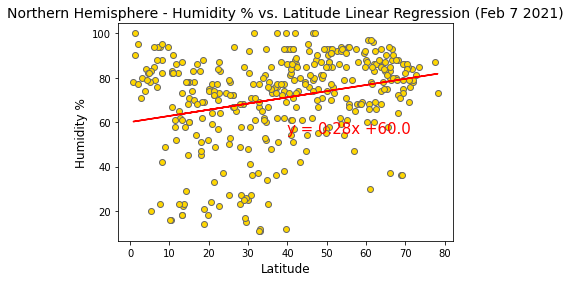

<Figure size 432x288 with 0 Axes>

In [17]:
# Create a Scatter Plot for humidity vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Humidity % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity %', fontsize=12)

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(40,55),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.030785330236126195


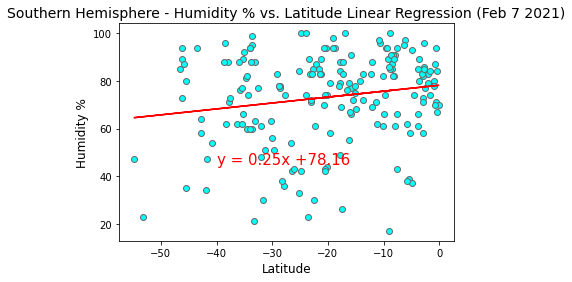

<Figure size 432x288 with 0 Axes>

In [18]:
# Create a Scatter Plot for humidity vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Humidity % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Humidity %', fontsize=12)

# Perform a linear regression on humidity vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.029369152810823543


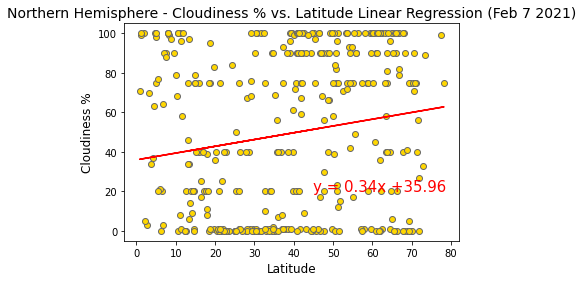

<Figure size 432x288 with 0 Axes>

In [19]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Cloudiness % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness %', fontsize=12)

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06648384865299714


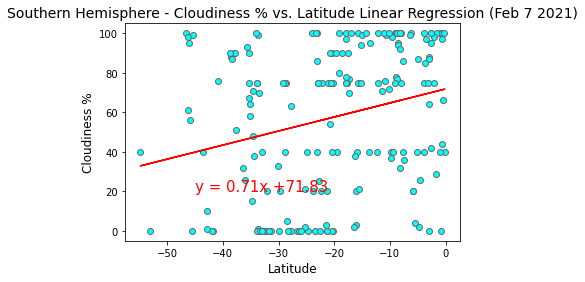

<Figure size 432x288 with 0 Axes>

In [20]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Cloudiness % vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Cloudiness %', fontsize=12)

# Perform a linear regression on cloudiness vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01842489968196377


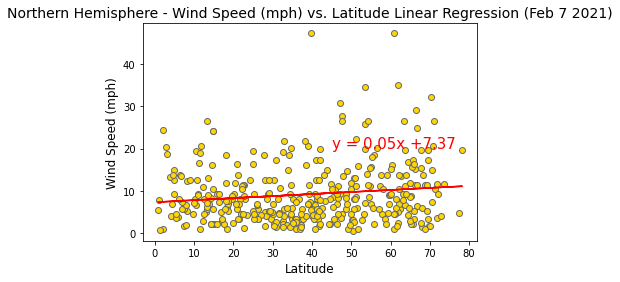

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a Scatter Plot for wind speed vs latitude
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="gold", edgecolors="dimgrey")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(45,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03353423538155575


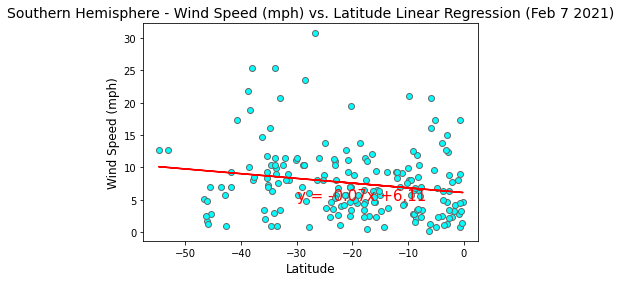

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a Scatter Plot for wind speed vs latitude
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
plt.scatter(x_values,y_values, marker="o", facecolors="aqua", edgecolors="dimgrey")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (Feb 7 2021)", fontsize=14)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Wind Speed (mph)', fontsize=12)

# Perform a linear regression on wind speed vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(-30,5),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

# Save the figure
plt.savefig("../output_data/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")